# 1. 라이브러리 가져오기

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 2. 데이터 전처리 및 정제

In [4]:
df = pd.read_csv('diabetes.csv')

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**결측치 확인**

In [9]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

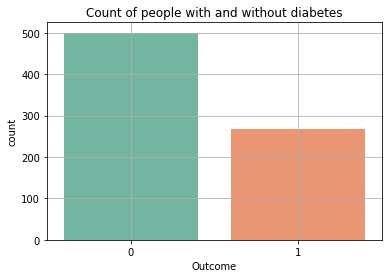

In [11]:
sns.countplot(x='Outcome',data=df, palette='Set2')
plt.title('Count of people with and without diabetes')
plt.grid()

In [12]:
top_age = df.Age.value_counts().head(15)
top_age

22    72
21    63
25    48
24    46
23    38
28    35
26    33
27    32
29    29
31    24
41    22
30    21
37    19
42    18
33    17
Name: Age, dtype: int64

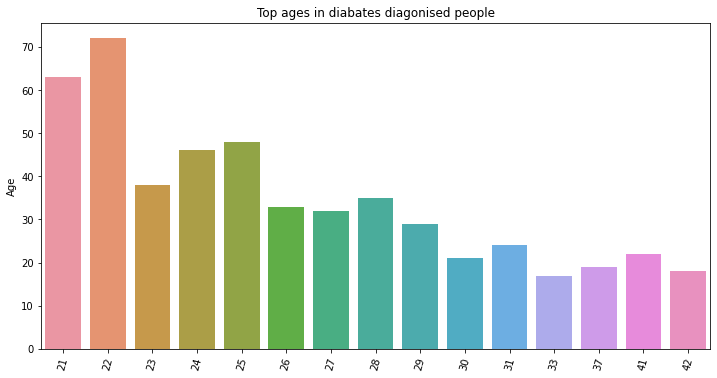

In [13]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title('Top ages in diabates diagonised people')
sns.barplot(x=top_age.index, y=top_age)

**피처, 레이블 데이터 생성**

In [14]:
x = df.drop(['Outcome'], axis = 1)
y = df.Outcome.values

# 3. 훈련, 테스트 데이터셋 분리

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=32)

In [16]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(614, 8) (154, 8) (614,) (154,)


**정규화**

In [17]:
sc =  MinMaxScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [18]:
x_train

array([[0.05882353, 0.52763819, 0.47540984, ..., 0.36214605, 0.04654142,
        0.        ],
       [0.41176471, 0.98492462, 0.73770492, ..., 0.59314456, 0.15926558,
        0.33333333],
       [0.        , 0.46733668, 0.49180328, ..., 0.42771982, 0.19385141,
        0.01666667],
       ...,
       [0.35294118, 0.40201005, 0.54098361, ..., 0.390462  , 0.10034159,
        0.33333333],
       [0.41176471, 0.62311558, 0.57377049, ..., 0.38002981, 0.0354398 ,
        0.26666667],
       [0.        , 0.70854271, 0.68852459, ..., 0.4828614 , 0.15157985,
        0.01666667]])

# 4. 모델 설계 

In [19]:
model = Sequential()
model.add(Dense(16, input_dim=8, activation = 'relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [20]:
model.compile(optimizer='RMSProp', loss='binary_crossentropy', metrics=['accuracy'])

# 5. 모델 학습

In [21]:
history = model.fit(x_train, y_train, 
                    validation_data = (x_test, y_test),
                    epochs=30, 
                    batch_size=10)

Epoch 1/30
62/62 [==============================] - 1s 6ms/step - loss: 0.6840 - accuracy: 0.5896 - val_loss: 0.6654 - val_accuracy: 0.6688
Epoch 2/30
62/62 [==============================] - 0s 3ms/step - loss: 0.6571 - accuracy: 0.6547 - val_loss: 0.6416 - val_accuracy: 0.6558
Epoch 3/30
62/62 [==============================] - 0s 3ms/step - loss: 0.6344 - accuracy: 0.6629 - val_loss: 0.6227 - val_accuracy: 0.6494
Epoch 4/30
62/62 [==============================] - 0s 3ms/step - loss: 0.6180 - accuracy: 0.6580 - val_loss: 0.5968 - val_accuracy: 0.7013
Epoch 5/30
62/62 [==============================] - 0s 3ms/step - loss: 0.6025 - accuracy: 0.6808 - val_loss: 0.5776 - val_accuracy: 0.7403
Epoch 6/30
62/62 [==============================] - 0s 3ms/step - loss: 0.5882 - accuracy: 0.6824 - val_loss: 0.5671 - val_accuracy: 0.7857
Epoch 7/30
62/62 [==============================] - 0s 3ms/step - loss: 0.5752 - accuracy: 0.7003 - val_loss: 0.5470 - val_accuracy: 0.7532
Epoch 8/30
62/62 [==

# 6. 모델 평가

In [22]:
ev = model.evaluate(x_train, y_train)
print( 'Accuracy: %.4f' % (ev[1]))

20/20 [==============================] - 0s 2ms/step - loss: 0.4854 - accuracy: 0.7622
Accuracy: 0.7622


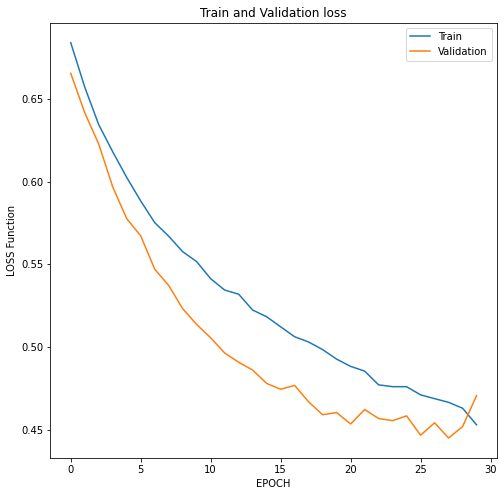

In [23]:
train_history = history.history["loss"]
validation_history = history.history["val_loss"]
fig = plt.figure(figsize=(8, 8))
plt.title("Train and Validation loss")
plt.xlabel("EPOCH")
plt.ylabel("LOSS Function")
plt.plot(train_history, label = 'Train')
plt.plot(validation_history,label = 'Validation' )
plt.legend()

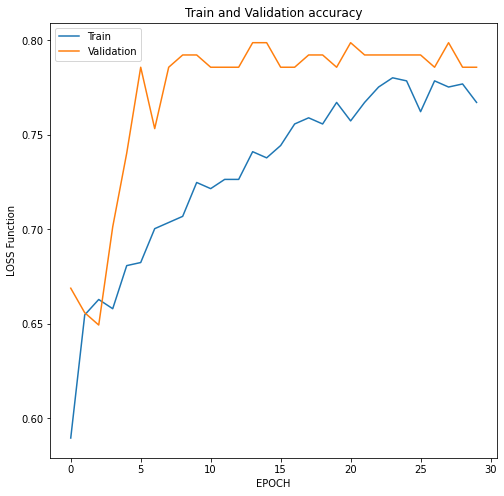

In [24]:
train_history = history.history["accuracy"]
validation_history = history.history["val_accuracy"]
fig = plt.figure(figsize=(8, 8))
plt.title("Train and Validation accuracy")
plt.xlabel("EPOCH")
plt.ylabel("LOSS Function")
plt.plot(train_history, label = 'Train')
plt.plot(validation_history,label = 'Validation' )
plt.legend()

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                144       
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 16)                272       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 705
Trainable params: 705
Non-trainable params: 0
_________________________________________________________________


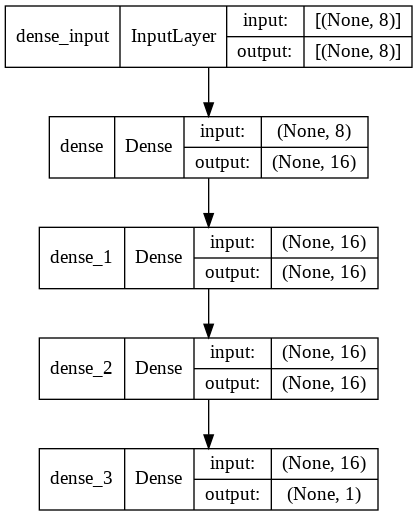

In [26]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

# + 랜덤 포레스트

In [27]:
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(x_train, y_train)
pred = rf_clf.predict(x_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {:.4f}'.format(accuracy))

랜덤 포레스트 정확도: 0.7987
